## Bike Rental - Kaggle


### In this submission, the 'count' column is converted to log(count) to achieve better results.

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import uniform, randint
import xgboost as xgb

In [147]:
df_train_read = pd.read_csv('Bike - train.csv', parse_dates=['datetime'],index_col=0)
df_test_read = pd.read_csv('Bike - test.csv', parse_dates=['datetime'],index_col=0)

print('size of Train Set:',df_train_read.shape)
print('size of Test Set:',df_test_read.shape)

size of Train Set: (10886, 11)
size of Test Set: (6493, 8)


In [148]:
df_train_read.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [149]:
df_test_read.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
datetime,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


### Added additional features

In [150]:
def Feature_AddOns(df):
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    df['hour'] = df.index.hour

In [151]:
Feature_AddOns(df_train_read)

In [152]:
df_train_read.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,5,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,5,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,5,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,5,4


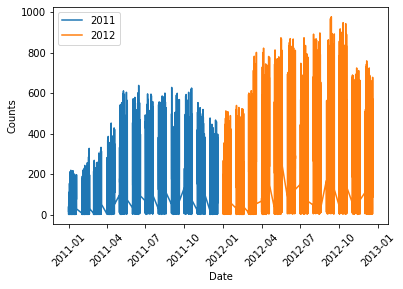

In [153]:
plt.plot(df_train_read['2011']['count'],label='2011')
plt.plot(df_train_read['2012']['count'],label='2012')
plt.xticks( rotation=45)
plt.xlabel('Date')
plt.ylabel('Counts')
plt.legend()
plt.show()

#### count converted to log(count)

In [154]:
df_train_read["count"] = df_train_read["count"].map(np.log1p)

In [155]:
df_train_read.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,2.833213,2011,1,1,5,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,3.713572,2011,1,1,5,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,3.496508,2011,1,1,5,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,2.639057,2011,1,1,5,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,0.693147,2011,1,1,5,4


In [156]:
df_train_read = df_train_read.sample(frac=1)
df_train_read.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
datetime,,,,,,,,,,,,,,,,
2011-08-17 07:00:00,3,0,1,1,27.06,31.060,65,6.0032,12,296,5.733341,2011,8,17,2,7
2012-07-13 22:00:00,3,0,1,1,30.34,33.335,45,0.0000,59,204,5.575949,2012,7,13,4,22
2012-02-14 14:00:00,1,0,1,1,16.40,20.455,40,15.0013,13,111,4.828314,2012,2,14,1,14
2011-06-09 11:00:00,2,0,1,1,36.90,42.425,42,15.0013,36,82,4.779123,2011,6,9,3,11
2011-11-18 21:00:00,4,0,1,1,11.48,13.635,48,11.0014,3,108,4.718499,2011,11,18,4,21


In [157]:
df_train_read.shape

(10886, 16)

In [158]:
X = df_train_read.drop(['count','casual','registered'], axis=1)
Y = df_train_read['count']
print('X shape:',X.shape)
print('Y shape:',Y.shape)

X shape: (10886, 13)
Y shape: (10886,)


In [159]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.1)

In [160]:
regressor_xgb = xgb.XGBRegressor(max_depth=5,n_estimators=150)
regressor_xgb.fit(X_train,Y_train, eval_set = [(X_train, Y_train), (X_val, Y_val)])

[16:12:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:3.90838	validation_1-rmse:3.89431
[1]	validation_0-rmse:3.52801	validation_1-rmse:3.51625
[2]	validation_0-rmse:3.18646	validation_1-rmse:3.17622
[3]	validation_0-rmse:2.87997	validation_1-rmse:2.87289
[4]	validation_0-rmse:2.60358	validation_1-rmse:2.59717
[5]	validation_0-rmse:2.35513	validation_1-rmse:2.34918
[6]	validation_0-rmse:2.13259	validation_1-rmse:2.12752
[7]	validation_0-rmse:1.93351	validation_1-rmse:1.92995
[8]	validation_0-rmse:1.75526	validation_1-rmse:1.75188
[9]	validation_0-rmse:1.59557	validation_1-rmse:1.59297
[10]	validation_0-rmse:1.45335	validation_1-rmse:1.4524
[11]	validation_0-rmse:1.325	validation_1-rmse:1.3244
[12]	validation_0-rmse:1.20988	validation_1-rmse:1.20965
[13]	validation_0-rmse:1.10743	validation_1-rmse:1.10779
[14]	validation_0-rmse:1.01453	validation_1-rmse:1.01507
[15]	validation_0-rmse:0.93177	validation_1

[138]	validation_0-rmse:0.240892	validation_1-rmse:0.286898
[139]	validation_0-rmse:0.240435	validation_1-rmse:0.286288
[140]	validation_0-rmse:0.240142	validation_1-rmse:0.286373
[141]	validation_0-rmse:0.239703	validation_1-rmse:0.286247
[142]	validation_0-rmse:0.239427	validation_1-rmse:0.285988
[143]	validation_0-rmse:0.239213	validation_1-rmse:0.285872
[144]	validation_0-rmse:0.238768	validation_1-rmse:0.285529
[145]	validation_0-rmse:0.23853	validation_1-rmse:0.285576
[146]	validation_0-rmse:0.238236	validation_1-rmse:0.285411
[147]	validation_0-rmse:0.238174	validation_1-rmse:0.285426
[148]	validation_0-rmse:0.238039	validation_1-rmse:0.285313
[149]	validation_0-rmse:0.237747	validation_1-rmse:0.285124


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=150,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

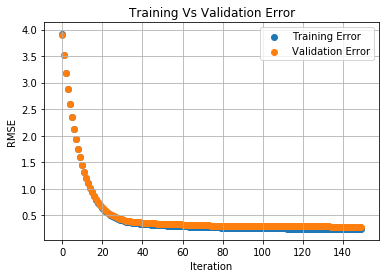

In [161]:
eval_result = regressor_xgb.evals_result()
training_rounds = range(len(eval_result['validation_0']['rmse']))
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

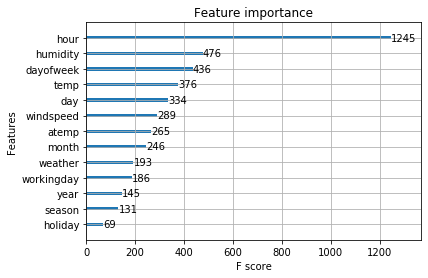

In [162]:
xgb.plot_importance(regressor_xgb)
plt.show()

# Prediction 

In [163]:
Feature_AddOns(df_test_read)

In [164]:
df_test_read.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
datetime,,,,,,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2
2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4


In [165]:
Y_predict = regressor_xgb.predict(df_test_read)

In [166]:
df_test_read.reset_index(level=0, inplace=True)
df_test_read.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4


In [167]:
df_test_read['count'] =np.expm1(Y_predict)

In [168]:
df_predict = df_test_read[['datetime','count']]
df_predict.head()

,datetime,count
0,2011-01-20 00:00:00,8.611863
1,2011-01-20 01:00:00,5.116816
2,2011-01-20 02:00:00,3.263920
3,2011-01-20 03:00:00,1.856891
4,2011-01-20 04:00:00,1.971828


In [169]:
df_predict.to_csv('df_predict.csv',index=False)